In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [22]:
geral_df = pd.read_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/filtered_cassini.xlsx')
atr_df = pd.read_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_atr.xlsx')
wtr_df = pd.read_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_wtr.xlsx')
obl_df = pd.read_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_obl.xlsx')

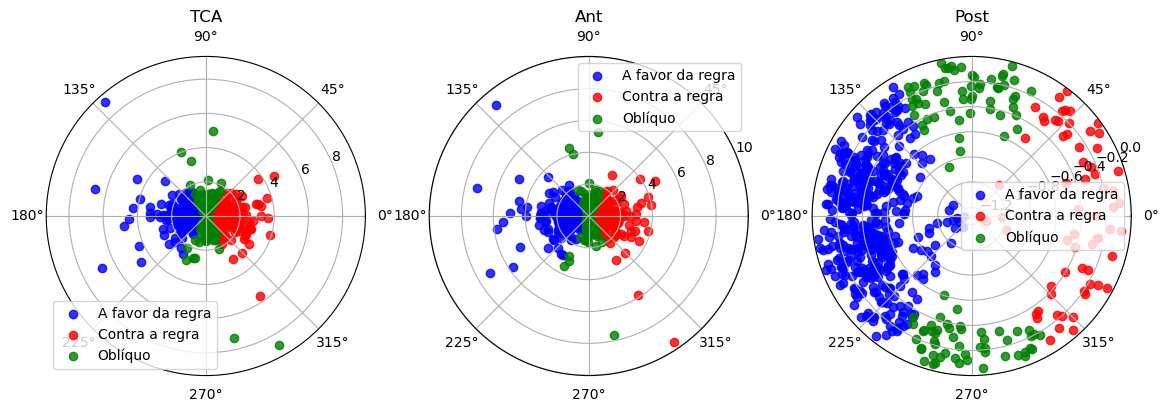

In [23]:
#Visualizar dados

fig, axs = plt.subplots(1, 3, figsize=(14, 5), subplot_kw={'projection': 'polar'})

axs[0].scatter(geral_df[geral_df['category_TCA'] == 'WTR']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'WTR']['C_TCA_Ast'], color='blue', label='A favor da regra', alpha=0.8)
axs[0].scatter(geral_df[geral_df['category_TCA'] == 'ATR']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'ATR']['C_TCA_Ast'], color='red', label='Contra a regra', alpha=0.8)
axs[0].scatter(geral_df[geral_df['category_TCA'] == 'OBL']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'OBL']['C_TCA_Ast'], color='green', label='Oblíquo', alpha=0.8)

axs[0].set_title("TCA")
axs[0].legend()


axs[1].scatter(geral_df[geral_df['category_Ant'] == 'WTR']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'WTR']['C_Ant_Ast'], color='blue', label='A favor da regra', alpha=0.8)
axs[1].scatter(geral_df[geral_df['category_Ant'] == 'ATR']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'ATR']['C_Ant_Ast'], color='red', label='Contra a regra', alpha=0.8)
axs[1].scatter(geral_df[geral_df['category_Ant'] == 'OBL']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'OBL']['C_Ant_Ast'], color='green', label='Oblíquo', alpha=0.8)

axs[1].set_title("Ant")
axs[1].legend()


axs[2].scatter(geral_df[geral_df['category_Post'] == 'WTR']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'WTR']['C_Post_Ast'], color='blue', label='A favor da regra', alpha=0.8)
axs[2].scatter(geral_df[geral_df['category_Post'] == 'ATR']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'ATR']['C_Post_Ast'], color='red', label='Contra a regra', alpha=0.8)
axs[2].scatter(geral_df[geral_df['category_Post'] == 'OBL']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'OBL']['C_Post_Ast'], color='green', label='Oblíquo', alpha=0.8)

axs[2].set_title("Post")
axs[2].legend()
plt.savefig('/Users/constancacachim/Desktop/golp_dados/images/geral', dpi=300)
plt.show()

In [24]:
def calculate_percentages(column):
    counts = column.value_counts()
    total = len(column)
    percentages = (counts / total) * 100
    return percentages

percentages_ant = calculate_percentages(geral_df['category_Ant'])
percentages_tca = calculate_percentages(geral_df['category_TCA'])
percentages_post = calculate_percentages(geral_df['category_Post'])

results = pd.DataFrame({
    'category_Ant': percentages_ant,
    'category_TCA': percentages_tca,
    'category_Post': percentages_post
}).transpose()

results.to_excel('/Users/constancacachim/Desktop/golp_dados/result_tables/category_percentages.xlsx')
print(results)

def calculate_tca_percentages(ant_value):
    filtered_df = geral_df[geral_df['category_Ant'] == ant_value]
    tca_counts = filtered_df['category_TCA'].value_counts()
    total_filtered = len(filtered_df)
    tca_percentages = (tca_counts / total_filtered) * 100
    return tca_percentages

results = pd.DataFrame({
    'ATR': calculate_tca_percentages('ATR'),
    'WTR': calculate_tca_percentages('WTR'),
    'OBL': calculate_tca_percentages('OBL')
}).transpose()

results.to_excel('/Users/constancacachim/Desktop/golp_dados/result_tables/category_tca_percentages.xlsx')
print('Ant vs TCA')
print(results)

def calculate_tca_percentages(ant_value):
    filtered_df = geral_df[geral_df['category_Ant'] == ant_value]
    tca_counts = filtered_df['category_Post'].value_counts()
    total_filtered = len(filtered_df)
    tca_percentages = (tca_counts / total_filtered) * 100
    return tca_percentages

results = pd.DataFrame({
    'ATR': calculate_tca_percentages('ATR'),
    'WTR': calculate_tca_percentages('WTR'),
    'OBL': calculate_tca_percentages('OBL')
}).transpose()

results.to_excel('/Users/constancacachim/Desktop/golp_dados/result_tables/category_post_percentages.xlsx')
print('Ant vs Post')
print(results)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_ant_tca = cramers_v(geral_df['category_Ant'], geral_df['category_TCA'])
cramers_v_ant_post = cramers_v(geral_df['category_Ant'], geral_df['category_Post'])
cramers_v_tca_post = cramers_v(geral_df['category_TCA'], geral_df['category_Post'])

correlation_results = pd.DataFrame({
    'category_Ant': ['-', cramers_v_ant_tca, cramers_v_ant_post],
    'category_TCA': [cramers_v_ant_tca, '-', cramers_v_tca_post],
    'category_Post': [cramers_v_ant_post, cramers_v_tca_post, '-']
}, index=['category_Ant', 'category_TCA', 'category_Post'])

correlation_results.to_excel('/Users/constancacachim/Desktop/golp_dados/result_tables/category_correlation.xlsx')
print(correlation_results)


                     ATR        OBL        WTR
category_Ant   35.090610  15.980231  48.929160
category_TCA   39.373970  20.428336  40.197694
category_Post  10.378913  18.286656  71.334432
Ant vs TCA
           ATR        OBL        WTR
ATR  95.774648   4.225352        NaN
WTR   3.703704  14.478114  81.818182
OBL  24.742268  74.226804   1.030928
Ant vs Post
           ATR        OBL        WTR
ATR  23.004695  22.065728  54.929577
WTR   2.693603  11.447811  85.858586
OBL   6.185567  30.927835  62.886598
              category_Ant category_TCA category_Post
category_Ant             -     0.755097      0.261557
category_TCA      0.755097            -        0.1592
category_Post     0.261557       0.1592             -


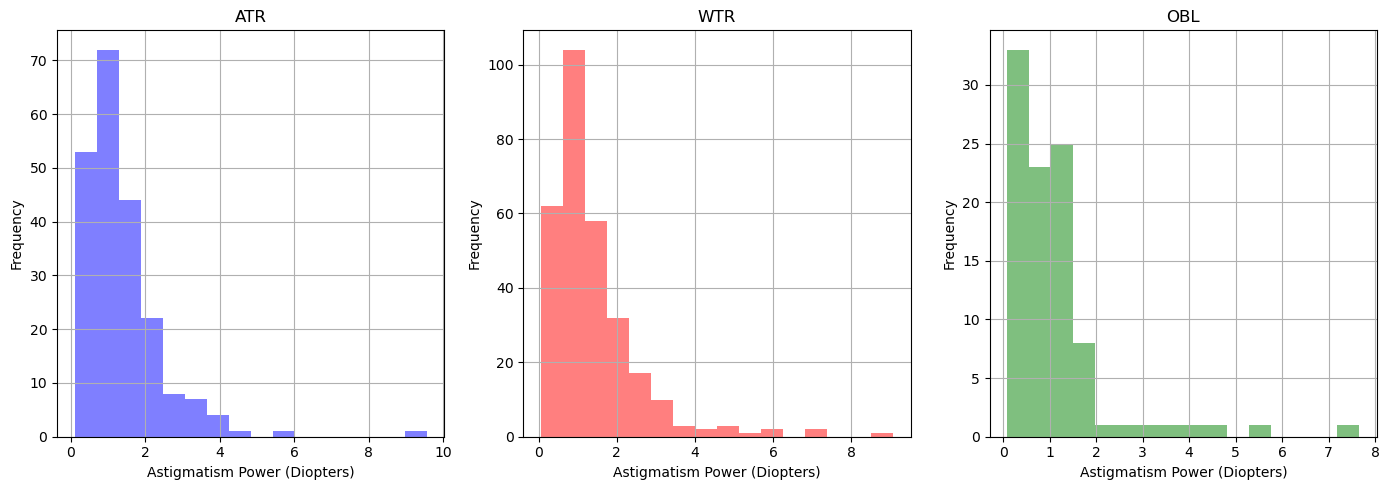

In [25]:
#Visualizar distribuição de Ant_Ast e ficar com 95% dos dados

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.hist(atr_df['C_Ant_Ast'], bins=16, alpha=0.5, color='blue')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('ATR')
plt.grid()

plt.subplot(1, 3, 2)
plt.hist(wtr_df['C_Ant_Ast'], bins=16, alpha=0.5, color='red')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('WTR')
plt.grid()

plt.subplot(1, 3, 3)
plt.hist(obl_df['C_Ant_Ast'], bins=16, alpha=0.5, color='green')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('OBL')
plt.grid()

plt.tight_layout()
plt.savefig('/Users/constancacachim/Desktop/golp_dados/images/mangitude_por_categoria', dpi=300)
plt.show()


In [26]:
data = geral_df['C_Ant_Ast'].to_numpy().reshape(-1, 1)
z_scores = np.abs((data - data.mean()) / data.std())
threshold = 2
outliers = z_scores > threshold
geral_df_no_outliers = geral_df[~outliers.flatten()]

geral_df_no_outliers.to_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/filtered_cassini_no_outliers.xlsx')
atr_df_no_outliers = geral_df_no_outliers[geral_df_no_outliers['category_Ant'] == 'ATR']
atr_df_no_outliers.to_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_atr_no_outliers.xlsx')

wtr_df_no_outliers = geral_df_no_outliers[geral_df_no_outliers['category_Ant'] == 'WTR']
wtr_df_no_outliers.to_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_wtr_no_outliers.xlsx')

obl_df_no_outliers = geral_df_no_outliers[geral_df_no_outliers['category_Ant'] == 'OBL']
obl_df_no_outliers.to_excel('/Users/constancacachim/Desktop/golp_dados/ficheiros/cassini_obl_no_outliers.xlsx')

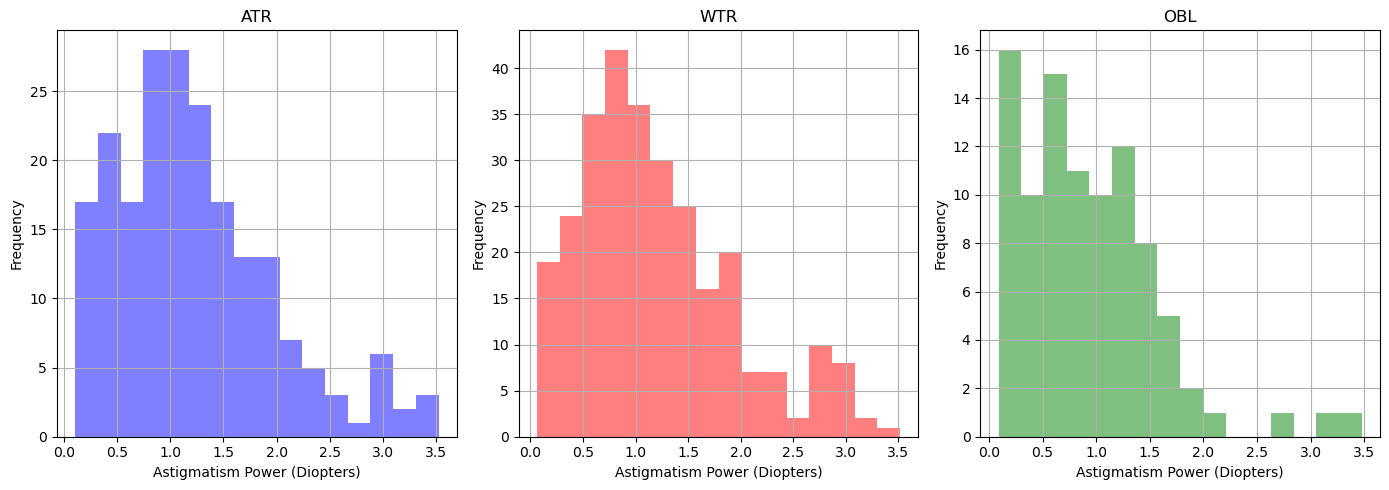

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.hist(atr_df_no_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='blue',label='With the Rule')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('ATR')
plt.grid()

plt.subplot(1, 3, 2)
plt.hist(wtr_df_no_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='red',label='With the Rule')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('WTR')
plt.grid()

plt.subplot(1, 3, 3)
plt.hist(obl_df_no_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='green',label='With the Rule')
plt.xlabel('Astigmatism Power (Diopters)')
plt.ylabel('Frequency')
plt.title('OBL')
plt.grid()

plt.tight_layout()
plt.savefig('/Users/constancacachim/Desktop/golp_dados/images/mangitude_por_categoria_sem_outliers', dpi=300)
plt.show()